## Polynomial Fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

#### Task 1

Write a function psi(x,m) defined as $\psi(x)=[1, x, x ^2, ..., x^m]$

In [2]:
def psi(x,m):
    vals = []
    for i in range(0,m):
        vals.append(x**i)
    return (vals)
    

In [3]:
psi(7,4)

[1, 7, 49, 343]

#### Task 2

Write a function $h(x,\alpha)$ defined as $h(x,\alpha)=\alpha^T\psi(x)$

In [4]:
def h(x,m,a):
    at = a.transpose()
    ps = psi(x,m)
    res = np.matmul(at,np.array([ps]))
    return res

In [5]:
h(7,4,np.array([[1,2,3]]))

array([[   1,    7,   49,  343],
       [   2,   14,   98,  686],
       [   3,   21,  147, 1029]])

#### Task 3
Create a random 3rd order polynomial (we call it p3)

In [6]:
p3 = np.poly1d([1,3,5,7])
print(np.poly1d(p3))

   3     2
1 x + 3 x + 5 x + 7


In [7]:
p3(4)

139

#### Task 4
Choose an interval [a,b], on which the polynomial is S-shaped.

In [8]:
def graph(poly,start_x , end_x):
    # graphis a polynomial for a specified range
    x = list(range(start_x , end_x))
    y =[]
    p = np.poly1d(poly)
    for i in range(start_x , end_x):
        y.append(p(i))
    plt.plot(x,y)
    plt.grid()
    plt.show()

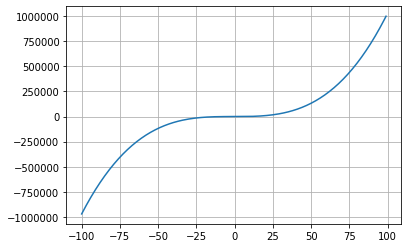

In [9]:
graph([1,3,5,7] ,-100,100)
#Lets go with -100 to 100 for our range


#### Task 5
Sample 30 random values in [a,b] and stored them in `xs`.

In [10]:
xs = random.sample(range(-100,100), 30)
xs.sort()
len(xs)

30

#### Task 6
For each x in xs, compute p3(x) and store them as `ys`.

In [11]:
ys = []
for i in xs:
    ys.append(p3(i))
    ys.sort()

In [12]:
len(ys)

30

#### Task 7:
Plot `ys` against `xs` on [a,b]. Does it look like a third order polynomial?

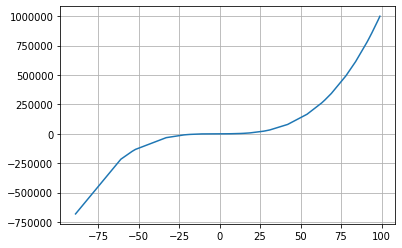

In [13]:
plt.plot(xs,ys)
plt.grid()
plt.show()

In [14]:
np.array([ys]).transpose().shape

(30, 1)

## Fitting the data

We will try to fit the data by a polynomial of order m=2. 

#### Task 8:

Using xs and psi, create the matrix X defined as 

<img src="matrixX.png">

In [15]:
X = []
for x in xs:
       X.append(psi(x,3))
X = np.array(X)

In [16]:
X.shape

(30, 3)

#### Task 9
Compute the optimal $\alpha$ using the expression $\alpha = (XX^T)^+Xy$ where $(XX^T)^+$ is the pseudoinverse matrix. y is our `ys` from the Task 6.

Unique $\alpha = (X^TX)^{-1}X^Ty$

In [17]:
first = np.linalg.inv(np.matmul(X.transpose() , X))
second = np.matmul(X.transpose() , np.array([ys]).transpose())

alpha = np.matmul(first,second)
alpha

array([[-6.11889777e+04],
       [ 5.46091501e+03],
       [ 3.40143900e+01]])

#### Task 10
Plot the data and the computed polynomial. Does it fit?

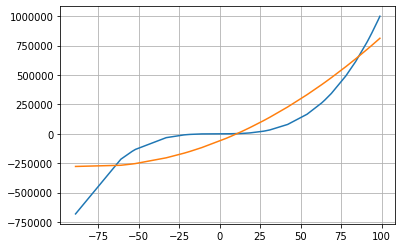

In [18]:
predict_y = np.matmul(X,alpha)
plt.grid()
plt.plot(xs,ys)
plt.plot(xs,predict_y)
plt.show()

## Looks quadratic not cubic which should be expected as our m=2

#### Task 11
Repeat the process for m=3,…,10. What do you observe?

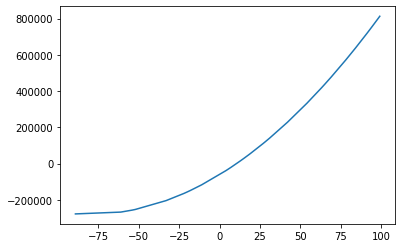

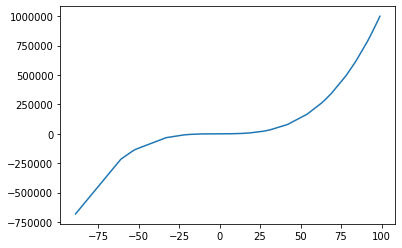

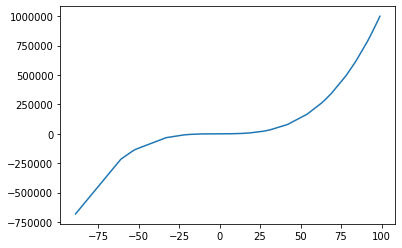

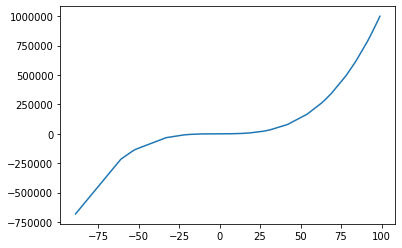

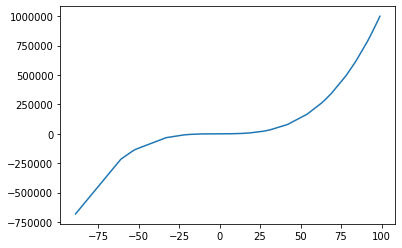

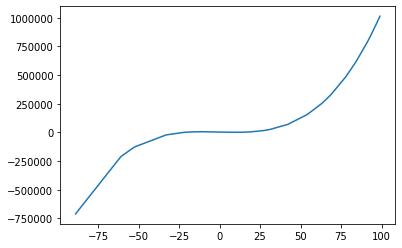

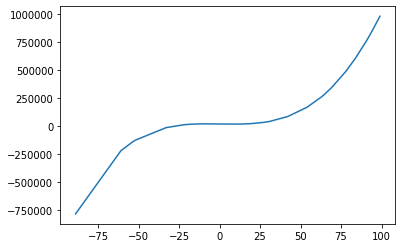

In [19]:
for i in range(3,10):
    X = []
    for x in xs:
        X.append(psi(x,i))
        
    X = np.array(X)

    first = np.linalg.inv(np.matmul(X.transpose() , X))
    second = np.matmul(X.transpose() , np.array([ys]).transpose())
    alpha = np.matmul(first,second)
    
    predict_y = np.matmul(X,alpha)
    plt.plot(xs,predict_y)
    plt.show()

#### Task 12
Plot the value of the loss (defined as $ l(\alpha^Tx, y) = \sum(\alpha^Tx - y)^2 $  ) for m=2,…,10. y is our `ys` from the Task 6. What do you observe? Could you tell the optimal m from the plot?

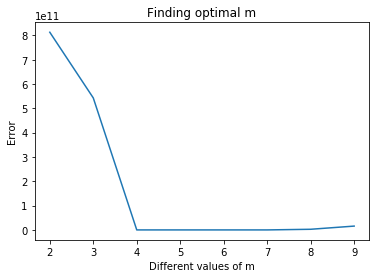

In [21]:
loss = []
for i in range(2,10):
    X = []
    for x in xs:
        X.append(psi(x,i))
        
    X = np.array(X)

    first = np.linalg.inv(np.matmul(X.transpose() , X))
    second = np.matmul(X.transpose() , np.array([ys]).transpose())
    alpha = np.matmul(first,second)
    
    predict_y = np.matmul(X,alpha)
    x_axis = list(range(2,10))
    loss.append(np.sum((np.array([ys]).transpose() - predict_y)**2))
    
plt.xlabel("Different values of m")
plt.ylabel("Error")
plt.title("Finding optimal m")
plt.plot(x_axis , loss)